Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Caricate 240 immagini della classe CHEETAH
Caricate 238 immagini della classe OCELOT
Caricate 190 immagini della classe CARACAL
Caricate 233 immagini della classe LIONS
Caricate 242 immagini della classe TIGER
Caricate 241 immagini della classe PUMA
Caricate 1384 immagini totali.
Shape di X: (1384, 224, 224, 3), Shape di y: (1384,)


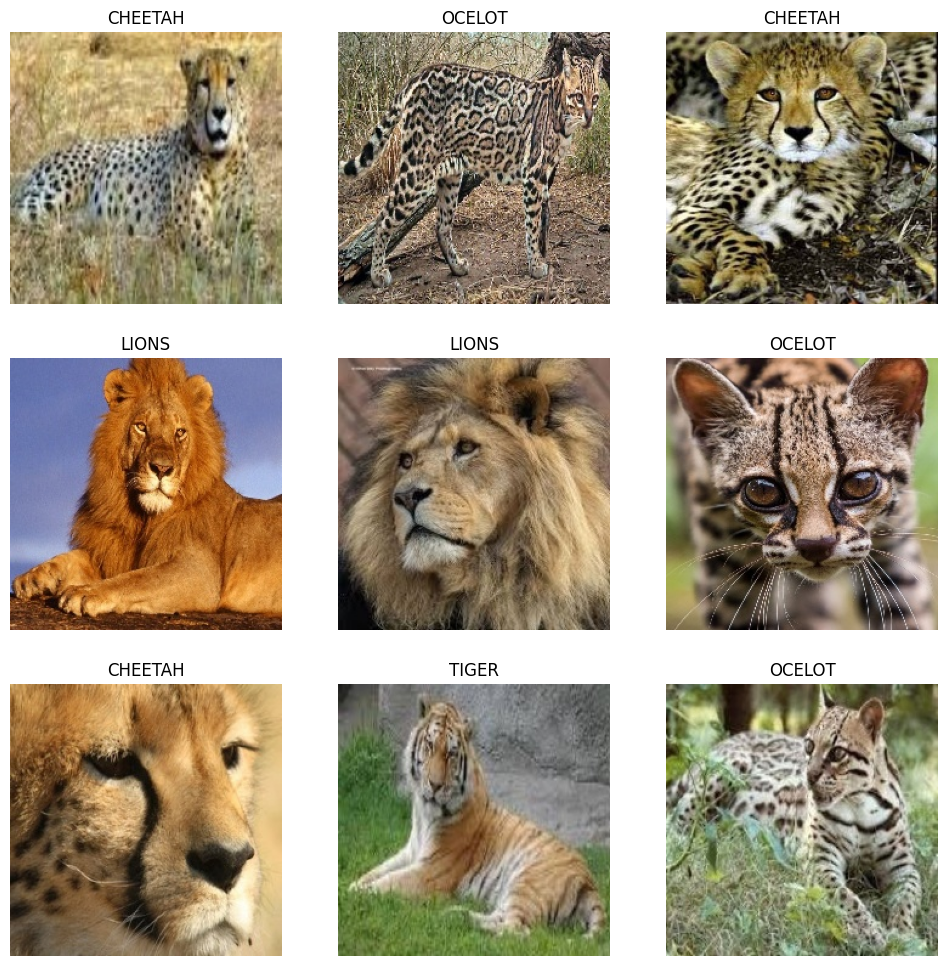

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from google.colab import drive
drive.mount('/content/drive')

# Upload Images from the Folder
def load_imgs(path, folders):
    imgs = []
    labels = []
    n_imgs = 0
    for c in folders:
        # For each file in the folder
        for f in os.listdir(os.path.join(path, c)):
            if not f.endswith('.jpg'):
                continue
            # Upload image
            im = Image.open(os.path.join(path, c, f)).copy()
            imgs.append(im)
            labels.append(c)
        print('Caricate {} immagini della classe {}'.format(len(imgs) - n_imgs, c))
        n_imgs = len(imgs)
    print('Caricate {} immagini totali.'.format(n_imgs))
    return imgs, labels

# Function to visualize sample of images with respective labels
def plot_sample(imgs, labels, nrows=4, ncols=4, resize=None):
    # Crete image grid
    fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    # Take random sample of images
    indices = np.random.choice(len(imgs), size=nrows*ncols, replace=False)
    for ax, idx in zip(axs.reshape(-1), indices):
        ax.axis('off')
        # Visualize image
        ax.set_title(labels[idx])
        im = imgs[idx]
        if isinstance(im, np.ndarray):
            im = Image.fromarray(im)
        if resize is not None:
            im = im.resize(resize)
        ax.imshow(im, cmap='gray')

# Mapping class -> index
label_to_idx = {
    'CHEETAH': 0,
    'OCELOT': 1,
    'CARACAL': 2,
    'LIONS': 3,
    'TIGER': 4,
    'PUMA': 5
}

# Mapping index -> class
idx_to_label = {v: k for k, v in label_to_idx.items()}

# Function to create the dataset
def make_dataset(imgs, labels, label_map, img_size):
    x = []
    y = []
    for im, l in zip(imgs, labels):
        # Preprocess image
        x_i = im.resize(img_size)
        x_i = np.asarray(x_i)

        # Encode label
        y_i = label_map[l]

        x.append(x_i)
        y.append(y_i)
    return np.array(x).astype('float32'), np.array(y)

# Function to save the model
def save_model(model, filepath):
    torch.save(model.state_dict(), filepath)

# Function to upload the model
def load_model(model_class, filepath, device='cpu'):
    model = model_class()
    model.load_state_dict(torch.load(filepath, map_location=device))
    model.to(device)
    return model

# Define class Dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.data[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.data)

# Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Upload the images from folder in Google Drive
imgs, labels = load_imgs('/content/drive/My Drive/Wild Cats Dataset', ['CHEETAH', 'OCELOT', 'CARACAL', 'LIONS', 'TIGER', 'PUMA'])
X_original, y_original = make_dataset(imgs, labels, label_to_idx, (224,224))
print('Shape di X: {}, Shape di y: {}'.format(X_original.shape, y_original.shape))

# Visualize sample of images
plot_sample(imgs, labels, 3, 3, resize=(224, 224))

# TASK 1:
## FEED FORWARD NEURAL NETWORK

Shape of X: (1384, 224, 224, 3)
Shape of y: (1384, 6)
Shape flattened images torch.Size([1384, 150528])


<ipython-input-2-a7e901706c4f>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train).float().to(device)
<ipython-input-2-a7e901706c4f>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val_tensor = torch.tensor(X_val).float().to(device)
<ipython-input-2-a7e901706c4f>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test).float().to(device)


X_train_tensor: torch.Size([830, 150528])
y_train_tensor: torch.Size([830])
X_val_tensor: torch.Size([277, 150528])
y_val_tensor: torch.Size([277])
X_test_tensor: torch.Size([277, 150528])
y_test_tensor: torch.Size([277])
Epoch 0, Train Acc: 16.8675%, Val Acc: 20.9386%, Train Loss: 1.7971, Val Loss: 12.6088
Epoch 1, Train Acc: 17.2289%, Val Acc: 10.4693%, Train Loss: 13.6536, Val Loss: 8.8545
Epoch 2, Train Acc: 14.2169%, Val Acc: 19.1336%, Train Loss: 8.5886, Val Loss: 8.7051
Epoch 3, Train Acc: 17.3494%, Val Acc: 19.1336%, Train Loss: 8.6329, Val Loss: 6.4479
Epoch 4, Train Acc: 17.3494%, Val Acc: 17.6895%, Train Loss: 6.4062, Val Loss: 4.4972
Epoch 5, Train Acc: 19.5181%, Val Acc: 16.6065%, Train Loss: 4.4496, Val Loss: 6.6531
Epoch 6, Train Acc: 16.8675%, Val Acc: 15.5235%, Train Loss: 6.9139, Val Loss: 8.0583
Epoch 7, Train Acc: 17.1084%, Val Acc: 20.9386%, Train Loss: 8.3578, Val Loss: 5.5782
Epoch 8, Train Acc: 17.2289%, Val Acc: 23.8267%, Train Loss: 5.8404, Val Loss: 2.8974
Ep

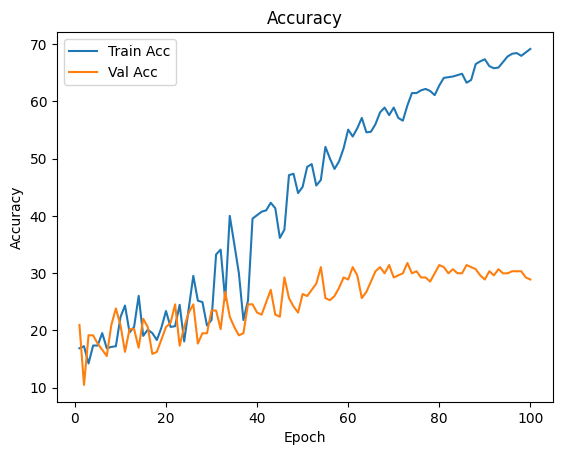

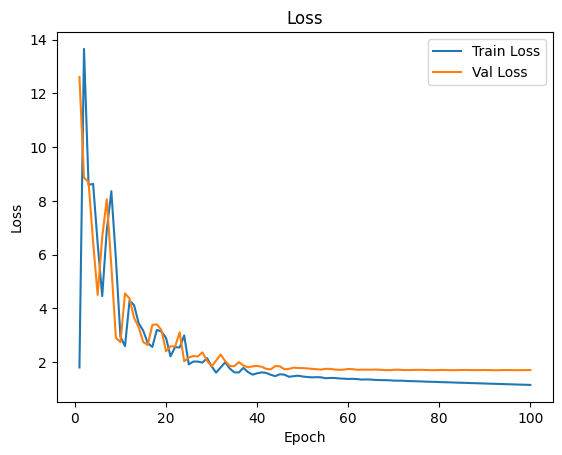

Test LossT1: 1.7458
Test AccuracyT1: 31.41%
Performance on the test set:
----------------------------
Test LossT1: 1.7458
Test AccuracyT1: 31.41%

Estimate of Classification Accuracy on New and Unseen Images:
------------------------------------------------------------
Based on the performance observed on the test set and assuming similar data distribution,
we can expect the model to achieve an accuracy of around 31.41% on new and unseen images.


In [2]:
# Use preprocessed data from make_dataset function

from sklearn.preprocessing import LabelBinarizer
from torch.nn import functional as F

# Normalize the images
X = X_original / 255.0

label_binarizer = LabelBinarizer()
y_encoded = label_binarizer.fit_transform(y_original)

print('Shape of X:', X.shape)
print('Shape of y:', y_encoded.shape)

# Convert the Numpy array to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)

# Flattening the images
X_flatt = torch.reshape(X_tensor, (X_tensor.shape[0], -1))

# Verify the shape
print('Shape flattened images', X_flatt.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_flatt, y_encoded, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train).float().to(device)
y_train_tensor = torch.argmax(torch.tensor(y_train), axis=1).to(device)
X_val_tensor = torch.tensor(X_val).float().to(device)
y_val_tensor = torch.argmax(torch.tensor(y_val), axis=1).to(device)
X_test_tensor = torch.tensor(X_test).float().to(device)
y_test_tensor = torch.argmax(torch.tensor(y_test), axis=1).to(device)

# Dimensions of tensors for train set
dim_X_train = X_train_tensor.size()
dim_y_train = y_train_tensor.size()

# Dimensions of tensors for validation set
dim_X_val = X_val_tensor.size()
dim_y_val = y_val_tensor.size()

# Dimensions of tensors for test set
dim_X_test = X_test_tensor.size()
dim_y_test = y_test_tensor.size()

# Print dimensions
print('X_train_tensor:', dim_X_train)
print('y_train_tensor:', dim_y_train)
print('X_val_tensor:', dim_X_val)
print('y_val_tensor:', dim_y_val)
print('X_test_tensor:', dim_X_test)
print('y_test_tensor:', dim_y_test)

class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.gelu = nn.GELU()  # Define GELU activation once

    def forward(self, x):
        x = self.gelu(self.layer1(x))  # Apply GELU activation after the first layer
        x = self.gelu(self.layer2(x))  # Apply GELU activation after the second layer
        x = self.output_layer(x)  # No activation for the output layer
        return x


def train(model, criterion, optimizer, x_train, y_train, x_val, y_val, n_epochs, device, eval_freq):
    training_lossesT1 = []
    validation_lossesT1 = []
    training_accuraciesT1 = []
    validation_accuraciesT1 = []

    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_train.to(device))

        # Compute loss
        loss = criterion(y_pred, y_train.to(device))

        # Backward pass
        loss.backward()
        optimizer.step()

        training_lossesT1.append(loss.item())
        training_accuracyT1 = compute_accuracy(y_pred, y_train) * 100
        training_accuraciesT1.append(training_accuracyT1)

        # Validation
        model.eval()
        if epoch % eval_freq == 0:
            with torch.no_grad():
                y_val_pred = model(x_val.to(device))
                val_loss = criterion(y_val_pred, y_val.to(device))
                validation_lossesT1.append(val_loss.item())
                validation_accuracyT1 = compute_accuracy(y_val_pred, y_val) * 100
                validation_accuraciesT1.append(validation_accuracyT1)
                print(f'Epoch {epoch}, Train Acc: {training_accuracyT1:.4f}%, Val Acc: {validation_accuracyT1:.4f}%, Train Loss: {loss:.4f}, Val Loss: {val_loss:.4f}')

    return training_lossesT1, validation_lossesT1, training_accuraciesT1, validation_accuraciesT1

def compute_accuracy(y_pred, y_true):
    y_pred = torch.argmax(y_pred, dim=1)
    correct = (y_pred == y_true).sum().item()
    total = len(y_true)
    accuracy = correct / total
    return accuracy

# Hyperparameters
input_dim = X_train_tensor.shape[1]
hidden_dim = 64
output_dim = len(label_to_idx)
n_epochs = 100
eval_freq = 1
model = FFNN(input_dim, hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_lossesT1, val_lossesT1, train_accsT1, val_accsT1 = train(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, n_epochs, device, eval_freq)

def plot_accuracy(train_accuraciesT1, val_accuraciesT1):
    epochs = range(1, len(train_accuraciesT1) + 1)
    plt.plot(epochs, train_accuraciesT1, label='Train Acc')
    plt.plot(epochs, val_accuraciesT1, label='Val Acc')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(train_accsT1, val_accsT1)

def plot_loss(train_lossesT1, val_lossesT1):
    epochs = range(1, len(train_lossesT1) + 1)
    plt.plot(epochs, train_lossesT1, label='Train Loss')
    plt.plot(epochs, val_lossesT1, label='Val Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

plot_loss(train_lossesT1, val_lossesT1)

# batch size
batch_size = 32
# Evaluate the model on the test set
model.eval()
test_lossT1 = 0
correct_testT1 = 0
total_testT1 = 0
with torch.no_grad():
    for i in range(0, len(X_test_tensor), batch_size):
        inputs = X_test_tensor[i:i+batch_size].to(device)
        labels = y_test_tensor[i:i+batch_size].to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_lossT1 += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_testT1 += labels.size(0)
        correct_testT1 += (predicted == labels).sum().item()
test_accuracyT1 = (100 * correct_testT1 / total_testT1)

# Print test loss and accuracy
print(f"Test LossT1: {test_lossT1 / (len(X_test_tensor) / batch_size):.4f}")
print(f"Test AccuracyT1: {test_accuracyT1:.2f}%")

# Comment on performance
print("Performance on the test set:")
print("----------------------------")
print(f"Test LossT1: {test_lossT1 / (len(X_test_tensor) / batch_size):.4f}")
print(f"Test AccuracyT1: {test_accuracyT1:.2f}%")

# Provide an estimate of classification accuracy on new and unseen images
print("\nEstimate of Classification Accuracy on New and Unseen Images:")
print("------------------------------------------------------------")
print("Based on the performance observed on the test set and assuming similar data distribution,")
print(f"we can expect the model to achieve an accuracy of around {test_accuracyT1:.2f}% on new and unseen images.")


# TASK 2:
## CONVOLUTIONAL NEURAL NETWORK & TRASFORMATIONS & COMPARISON OF THE MODELS

Shape of X: (1384, 224, 224, 3)
Shape of y: (1384, 6)
Shape flattened images torch.Size([1384, 150528])


<ipython-input-3-706a2eaa3ab0>:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train).float().to(device)
<ipython-input-3-706a2eaa3ab0>:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val_tensor = torch.tensor(X_val).float().to(device)
<ipython-input-3-706a2eaa3ab0>:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test).float().to(device)


X_train_tensor: torch.Size([830, 150528])
y_train_tensor: torch.Size([830])
X_val_tensor: torch.Size([277, 150528])
y_val_tensor: torch.Size([277])
X_test_tensor: torch.Size([277, 150528])
y_test_tensor: torch.Size([277])
CustomCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=6, bias=True)
)
Epoch [1/10], Train LossT2: 1

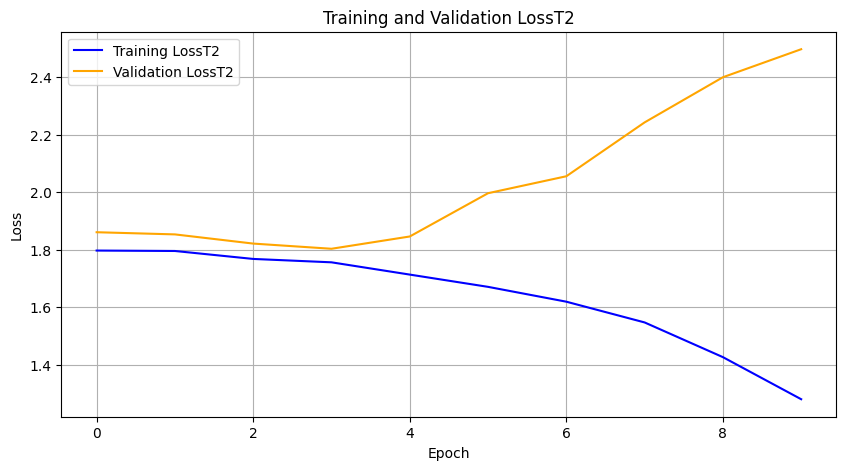

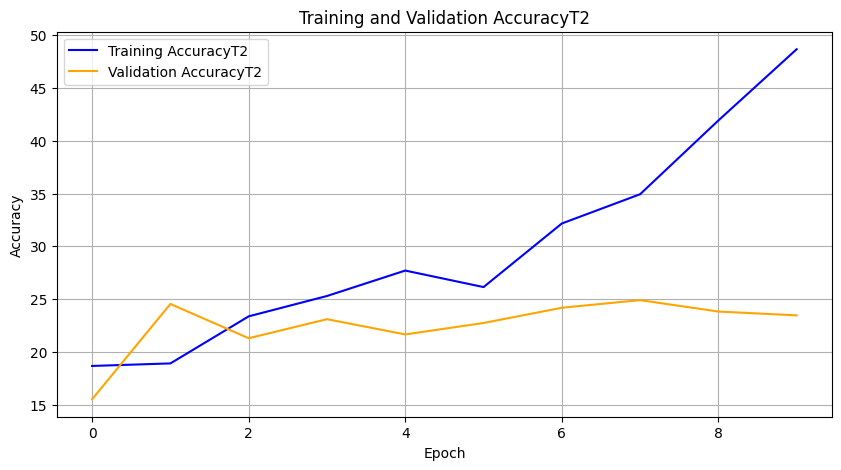

Test LossT2: 2.7923
Test AccuracyT2: 19.13%
Performance on the test set:
----------------------------
Test LossT2: 2.7923
Test AccuracyT2: 19.13%

Estimate of Classification Accuracy on New and Unseen Images:
------------------------------------------------------------
Based on the performance observed on the test set and assuming similar data distribution,
we can expect the model to achieve an accuracy of around 19.13% on new and unseen images.
###################################################################################################################
###################################################################################################################
COMPARISON BETWEEN THE TWO MODELS
T1 - Final Train Accuracy: 69.16%, Final Validation Accuracy: 28.88%
T2 - Final Train Accuracy: 48.67%, Final Validation Accuracy: 23.47%
T1 - Mean Train Accuracy: 43.56%, Mean Validation Accuracy: 25.28%
T2 - Mean Train Accuracy: 29.78%, Mean Validation Accuracy: 22.53%
T-statistic:

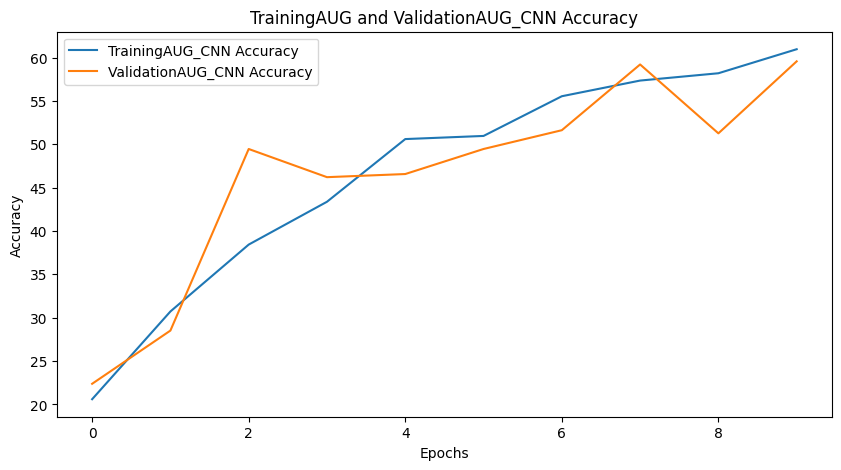

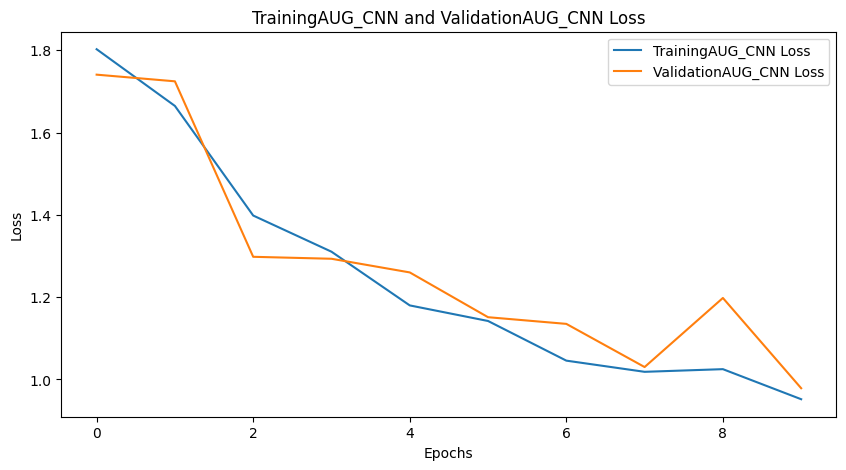

Test LossAUG_CNN: 0.9736
Test AccuracyAUG_CNN: 59.21%
Performance on the test set:
----------------------------
Test LossAUG_CNN: 0.9736
Test AccuracyAUG_CNN: 59.21%

Estimate of Classification Accuracy on New and Unseen Images:
------------------------------------------------------------
Based on the performance observed on the test set and assuming similar data distribution,
we can expect the model to achieve an accuracy of around 59.21% on new and unseen images.
###################################################################################################################
###################################################################################################################
TRANSFORMATIONS FFNN
Shape of X: (1384, 224, 224, 3)
Shape of y: (1384, 6)
Epoch 1, Train AccAUG_FFNN: 18.7952%, Val AccAUG_FFNN: 15.5235%, Train LossAUG_FFNN: 4.5297, Val LossAUG_FFNN: 2.1634
Epoch 2, Train AccAUG_FFNN: 25.3012%, Val AccAUG_FFNN: 19.8556%, Train LossAUG_FFNN: 1.8329, Val LossAUG_

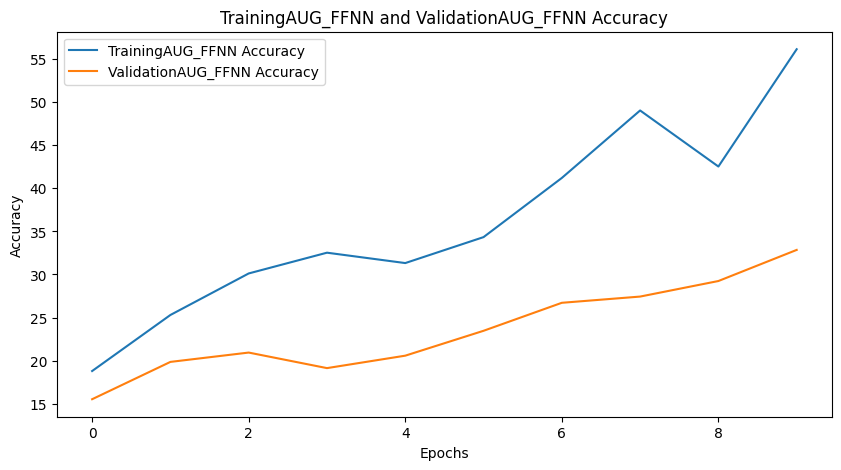

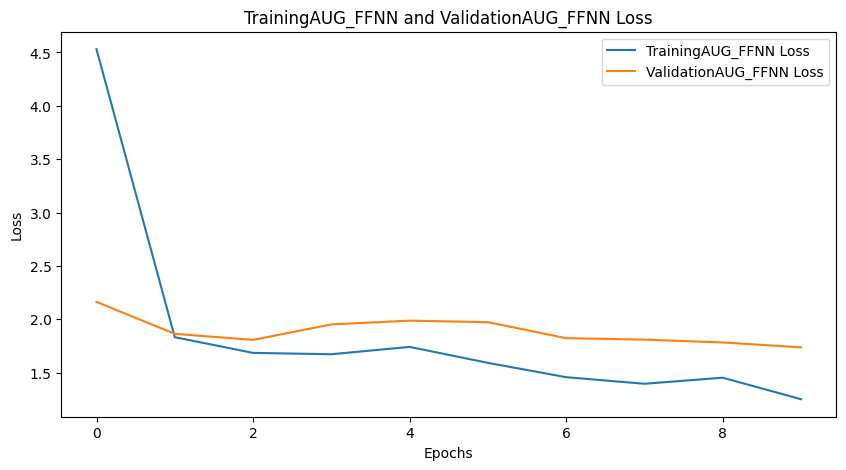

Test LossAUG_FFNN: 1.7208
Test AccuracyAUG_FFNN: 30.69%
Performance on the test set:
----------------------------
Test LossAUG_FFNN: 1.7208
Test AccuracyAUG_FFNN: 30.69%

Estimate of Classification Accuracy on New and Unseen Images:
------------------------------------------------------------
Based on the performance observed on the test set and assuming similar data distribution,
we can expect the model to achieve an accuracy of around 30.69% on new and unseen images.


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Use preprocessed data from make_dataset function

from sklearn.preprocessing import LabelBinarizer
from torch.nn import functional as F

# Normalize the images
X = X_original / 255.0

label_binarizer = LabelBinarizer()
y_encoded = label_binarizer.fit_transform(y_original)

print('Shape of X:', X.shape)
print('Shape of y:', y_encoded.shape)

# Convert the Numpy array to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)

# Flattening the images
X_flatt = torch.reshape(X_tensor, (X_tensor.shape[0], -1))

# Verify the shape
print('Shape flattened images', X_flatt.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_flatt, y_encoded, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train).float().to(device)
y_train_tensor = torch.argmax(torch.tensor(y_train), axis=1).to(device)
X_val_tensor = torch.tensor(X_val).float().to(device)
y_val_tensor = torch.argmax(torch.tensor(y_val), axis=1).to(device)
X_test_tensor = torch.tensor(X_test).float().to(device)
y_test_tensor = torch.argmax(torch.tensor(y_test), axis=1).to(device)

# Dimensions of tensors for train set
dim_X_train = X_train_tensor.size()
dim_y_train = y_train_tensor.size()

# Dimensions of tensors for validation set
dim_X_val = X_val_tensor.size()
dim_y_val = y_val_tensor.size()

# Dimensions of tensors for test set
dim_X_test = X_test_tensor.size()
dim_y_test = y_test_tensor.size()

# Print dimensions
print('X_train_tensor:', dim_X_train)
print('y_train_tensor:', dim_y_train)
print('X_val_tensor:', dim_X_val)
print('y_val_tensor:', dim_y_val)
print('X_test_tensor:', dim_X_test)
print('y_test_tensor:', dim_y_test)

# Define the CNN model
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 6)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
model2 = CustomCNN()
print(model2)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

# Number of epochs
n_epochs = 10

# Move model to the device specified above
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)
criterion.to(device)

batch_size = 32

# Lists to memorize the loss and accuracy
train_lossesT2 = []
val_lossesT2 = []
train_accuraciesT2 = []
val_accuraciesT2 = []

# Assuming the original images were of shape (3, 224, 224)
X_train_tensor = X_train_tensor.view(-1, 3, 224, 224)
X_val_tensor = X_val_tensor.view(-1, 3, 224, 224)
X_test_tensor = X_test_tensor.view(-1, 3, 224, 224)

for epoch in range(n_epochs):
    model2.train()
    train_lossT2 = 0.0
    correct_train = 0
    total_train = 0
    for i in range(0, len(X_train_tensor), batch_size):
        # Get mini-batch
        inputs = X_train_tensor[i:i+batch_size].to(device)
        labels = y_train_tensor[i:i+batch_size].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model2(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()
        train_lossT2 += loss.item()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_accuracyT2 = 100 * correct_train / total_train

    # Validation
    model2.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for i in range(0, len(X_val_tensor), batch_size):
            inputs = X_val_tensor[i:i+batch_size].to(device)
            labels = y_val_tensor[i:i+batch_size].to(device)
            outputs = model2(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    val_accuracy = 100 * correct_val / total_val

    # Add the losses and accuracies to the lists
    train_lossesT2.append(train_lossT2 / (len(X_train_tensor) / batch_size))
    val_lossesT2.append(val_loss / (len(X_val_tensor) / batch_size))
    train_accuraciesT2.append(train_accuracyT2)
    val_accuraciesT2.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{n_epochs}], Train LossT2: {train_lossesT2[-1]:.4f}, Train AccT2: {train_accuraciesT2[-1]:.2f}%, Val LossT2: {val_lossesT2[-1]:.4f}, Val AccT2: {val_accuraciesT2[-1]:.2f}%")

import matplotlib.pyplot as plt

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(train_lossesT2, label='Training LossT2', color='blue')
plt.plot(val_lossesT2, label='Validation LossT2', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation LossT2')
plt.legend()
plt.grid(True)
plt.show()

# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accuraciesT2, label='Training AccuracyT2', color='blue')
plt.plot(val_accuraciesT2, label='Validation AccuracyT2', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation AccuracyT2')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
test_lossT2 = 0.0
correct_test = 0
total_test = 0
model2.eval()
with torch.no_grad():
    for i in range(0, len(X_test_tensor), batch_size):
        inputs = X_test_tensor[i:i+batch_size].to(device)
        labels = y_test_tensor[i:i+batch_size].to(device)
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        test_lossT2 += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)

# Calculate test accuracy
test_accuracyT2 = 100 * correct_test / total_test

# Print test loss and accuracy
print(f"Test LossT2: {test_lossT2 / (len(X_test_tensor) / batch_size):.4f}")
print(f"Test AccuracyT2: {test_accuracyT2:.2f}%")

# Comment on performance
print("Performance on the test set:")
print("----------------------------")
print(f"Test LossT2: {test_lossT2 / (len(X_test_tensor) / batch_size):.4f}")
print(f"Test AccuracyT2: {test_accuracyT2:.2f}%")

# Provide an estimate of classification accuracy on new and unseen images
print("\nEstimate of Classification Accuracy on New and Unseen Images:")
print("------------------------------------------------------------")
print("Based on the performance observed on the test set and assuming similar data distribution,")
print("we can expect the model to achieve an accuracy of around", f"{test_accuracyT2:.2f}%", "on new and unseen images.")

print('###################################################################################################################')
print('###################################################################################################################')

print('COMPARISON BETWEEN THE TWO MODELS')

# Final Accuracies
final_train_acc_T1 = train_accsT1[-1]
final_val_acc_T1 = val_accsT1[-1]
final_train_acc_T2 = train_accuraciesT2[-1]
final_val_acc_T2 = val_accuraciesT2[-1]

print(f"T1 - Final Train Accuracy: {final_train_acc_T1:.2f}%, Final Validation Accuracy: {final_val_acc_T1:.2f}%")
print(f"T2 - Final Train Accuracy: {final_train_acc_T2:.2f}%, Final Validation Accuracy: {final_val_acc_T2:.2f}%")

# Mean Accuracies
mean_train_acc_T1 = np.mean(train_accsT1)
mean_val_acc_T1 = np.mean(val_accsT1)
mean_train_acc_T2 = np.mean(train_accuraciesT2)
mean_val_acc_T2 = np.mean(val_accuraciesT2)

print(f"T1 - Mean Train Accuracy: {mean_train_acc_T1:.2f}%, Mean Validation Accuracy: {mean_val_acc_T1:.2f}%")
print(f"T2 - Mean Train Accuracy: {mean_train_acc_T2:.2f}%, Mean Validation Accuracy: {mean_val_acc_T2:.2f}%")

from scipy.stats import ttest_ind

# Test-t on validation accuracies
t_stat, p_value = ttest_ind(val_accsT1, val_accuraciesT2)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The differences in the validation performances between the 2 models are statistically significant.")
else:
    print("The differences in the validation performances between the 2 models are NOT statistically significant.")

print('###################################################################################################################')
print('###################################################################################################################')

print('TRANSFORMATIONS CNN')

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Normalize the images
X = X_original / 255.0

label_binarizer = LabelBinarizer()
y_encoded = label_binarizer.fit_transform(y_original)

print('Shape of X:', X.shape)
print('Shape of y:', y_encoded.shape)

# Convert the Numpy array to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(np.argmax(y_encoded, axis=1), dtype=torch.long)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

# Ensure the images have the correct shape [batch_size, channels, height, width]
X_train = X_train.permute(0, 3, 1, 2)
X_val = X_val.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

# Define the augmentation pipeline
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[129.73103399 / 255.0, 115.74991322 / 255.0, 93.65555466 / 255.0],
                         std=[62.75922075 / 255.0, 58.79315587 / 255.0, 59.74380684 / 255.0])
])

# Since the validation and test sets should remain unaugmented
val_test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[129.73103399 / 255.0, 115.74991322 / 255.0, 93.65555466 / 255.0],
                         std=[62.75922075 / 255.0, 58.79315587 / 255.0, 59.74380684 / 255.0])
])

# Custom Dataset class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Create datasets with transformations
train_dataset = CustomDataset(X_train, y_train, transform=train_transforms)
val_dataset = CustomDataset(X_val, y_val, transform=val_test_transforms)
test_dataset = CustomDataset(X_test, y_test, transform=val_test_transforms)

# Data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Define the CNN model
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 6)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CustomCNN().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model with augmented data
n_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}, Train AccAUG_CNN: {train_accuracy:.4f}%, Val AccAUG_CNN: {val_accuracy:.4f}%, Train LossAUG_CNN: {running_loss / len(train_loader):.4f}, Val LossAUG_CNN: {val_loss / len(val_loader):.4f}')

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.title("TrainingAUG and ValidationAUG_CNN Accuracy")
plt.plot(range(n_epochs), train_accuracies, label="TrainingAUG_CNN Accuracy")
plt.plot(range(n_epochs), val_accuracies, label="ValidationAUG_CNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.title("TrainingAUG_CNN and ValidationAUG_CNN Loss")
plt.plot(range(n_epochs), train_losses, label="TrainingAUG_CNN Loss")
plt.plot(range(n_epochs), val_losses, label="ValidationAUG_CNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Test the model on the test set
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)

test_accuracy = 100 * correct_test / total_test

# Print test loss and accuracy
print(f"Test LossAUG_CNN: {test_loss / len(test_loader):.4f}")
print(f"Test AccuracyAUG_CNN: {test_accuracy:.2f}%")

# Comment on performance
print("Performance on the test set:")
print("----------------------------")
print(f"Test LossAUG_CNN: {test_loss / len(test_loader):.4f}")
print(f"Test AccuracyAUG_CNN: {test_accuracy:.2f}%")

# Provide an estimate of classification accuracy on new and unseen images
print("\nEstimate of Classification Accuracy on New and Unseen Images:")
print("------------------------------------------------------------")
print(f"Based on the performance observed on the test set and assuming similar data distribution,")
print(f"we can expect the model to achieve an accuracy of around {test_accuracy:.2f}% on new and unseen images.")

print('###################################################################################################################')
print('###################################################################################################################')

print('TRANSFORMATIONS FFNN')

# Normalize the images
X = X_original / 255.0

label_binarizer = LabelBinarizer()
y_encoded = label_binarizer.fit_transform(y_original)

print('Shape of X:', X.shape)
print('Shape of y:', y_encoded.shape)

# Convert the Numpy array to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(np.argmax(y_encoded, axis=1), dtype=torch.long)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

# Flatten the images
X_train = X_train.view(X_train.size(0), -1)
X_val = X_val.view(X_val.size(0), -1)
X_test = X_test.view(X_test.size(0), -1)

# Define the FFNN model
class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        self.gelu = nn.GELU()

    def forward(self, x):
        x = self.gelu(self.layer1(x))
        x = self.gelu(self.layer2(x))
        x = self.output_layer(x)
        return x

# Create datasets
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

# Data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = 6
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FFNN(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model with augmented data
n_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}, Train AccAUG_FFNN: {train_accuracy:.4f}%, Val AccAUG_FFNN: {val_accuracy:.4f}%, Train LossAUG_FFNN: {running_loss / len(train_loader):.4f}, Val LossAUG_FFNN: {val_loss / len(val_loader):.4f}')

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.title("TrainingAUG_FFNN and ValidationAUG_FFNN Accuracy")
plt.plot(range(n_epochs), train_accuracies, label="TrainingAUG_FFNN Accuracy")
plt.plot(range(n_epochs), val_accuracies, label="ValidationAUG_FFNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.title("TrainingAUG_FFNN and ValidationAUG_FFNN Loss")
plt.plot(range(n_epochs), train_losses, label="TrainingAUG_FFNN Loss")
plt.plot(range(n_epochs), val_losses, label="ValidationAUG_FFNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Test the model on the test set
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)

test_accuracy = 100 * correct_test / total_test

# Print test loss and accuracy
print(f"Test LossAUG_FFNN: {test_loss / len(test_loader):.4f}")
print(f"Test AccuracyAUG_FFNN: {test_accuracy:.2f}%")

# Comment on performance
print("Performance on the test set:")
print("----------------------------")
print(f"Test LossAUG_FFNN: {test_loss / len(test_loader):.4f}")
print(f"Test AccuracyAUG_FFNN: {test_accuracy:.2f}%")

# Provide an estimate of classification accuracy on new and unseen images
print("\nEstimate of Classification Accuracy on New and Unseen Images:")
print("------------------------------------------------------------")
print(f"Based on the performance observed on the test set and assuming similar data distribution,")
print(f"we can expect the model to achieve an accuracy of around {test_accuracy:.2f}% on new and unseen images.")




# TASK 2 BONUS:
## GRID SEARCH

In [4]:
print('Grid Search with Train-Validation Split (not required)')

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Convert in tensors
X_train_tensor = torch.tensor(X_train).to(device)
y_train_tensor = torch.tensor(y_train).to(device)
X_val_tensor = torch.tensor(X_val).to(device)
y_val_tensor = torch.tensor(y_val).to(device)

# Converti in tensors with correct order
X_train_tensor = torch.tensor(X_train).permute(0, 3, 1, 2).to(device)  # (batch_size, height, width, channels) -> (batch_size, channels, height, width)
y_train_tensor = torch.tensor(y_train).to(device)
X_val_tensor = torch.tensor(X_val).permute(0, 3, 1, 2).to(device)
y_val_tensor = torch.tensor(y_val).to(device)

def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(train_loader.dataset)  # Train Loss
        epoch_train_accuracy = 100 * correct / total  # Train Accuracy

        val_loss, val_accuracy = evaluate(model, val_loader, criterion)  # Val Loss and Val Accuracy

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.4f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy*100:.4f}%')

    return val_accuracy

def evaluate(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()

    val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct / len(val_loader.dataset)
    return val_loss, val_accuracy

from torch.utils.data import DataLoader, TensorDataset

# Training and Validation Data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Hyperparameters Combination
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'batch_size': [16, 32, 64],
    'num_epochs': [10, 20]
}

best_accuracy = 0.0
best_params = {}

# Grid search
for lr in param_grid['learning_rate']:
    for batch_size in param_grid['batch_size']:
        for num_epochs in param_grid['num_epochs']:
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

            model = CustomCNN()
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            accuracy = train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, num_epochs)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'learning_rate': lr, 'batch_size': batch_size, 'num_epochs': num_epochs}

print('Best Accuracy: {:.4f}'.format(best_accuracy))
print('Best Params:', best_params)

Grid Search with Train-Validation Split (not required)
Epoch 1/10, Train Loss: 17281486.0433, Train Accuracy: 17.3442%, Val Loss: 1.7999, Val Accuracy: 16.9675%
Epoch 2/10, Train Loss: 1.8008, Train Accuracy: 17.0732%, Val Loss: 1.7863, Val Accuracy: 21.6606%
Epoch 3/10, Train Loss: 1.7991, Train Accuracy: 17.0732%, Val Loss: 1.7840, Val Accuracy: 16.9675%
Epoch 4/10, Train Loss: 1.8056, Train Accuracy: 16.3505%, Val Loss: 1.7987, Val Accuracy: 16.6065%
Epoch 5/10, Train Loss: 1.8009, Train Accuracy: 16.0795%, Val Loss: 1.7940, Val Accuracy: 16.2455%
Epoch 6/10, Train Loss: 1.8036, Train Accuracy: 15.4472%, Val Loss: 1.7999, Val Accuracy: 16.6065%
Epoch 7/10, Train Loss: 1.8042, Train Accuracy: 15.8988%, Val Loss: 1.7767, Val Accuracy: 21.6606%
Epoch 8/10, Train Loss: 1.8076, Train Accuracy: 16.9828%, Val Loss: 1.7796, Val Accuracy: 21.6606%
Epoch 9/10, Train Loss: 1.7958, Train Accuracy: 15.8085%, Val Loss: 1.7935, Val Accuracy: 16.6065%
Epoch 10/10, Train Loss: 1.8029, Train Accuracy

In [5]:
print('Grid Search with Hold-out Cross Validation with KFold')

from sklearn.model_selection import train_test_split, KFold

X_train_val, X_test, y_train_val, y_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Training and Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 60% train, 20% validation

# Convert in tensors
X_train_tensor = torch.tensor(X_train).permute(0, 3, 1, 2).to(device)
y_train_tensor = torch.tensor(y_train).to(device)
X_val_tensor = torch.tensor(X_val).permute(0, 3, 1, 2).to(device)
y_val_tensor = torch.tensor(y_val).to(device)
X_test_tensor = torch.tensor(X_test).permute(0, 3, 1, 2).to(device)
y_test_tensor = torch.tensor(y_test).to(device)

def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_accuracy = 100 * correct / total

        val_loss, val_accuracy = evaluate(model, val_loader, criterion)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.4f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy*100:.4f}%')

    return val_accuracy

def evaluate(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()

    val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct / len(val_loader.dataset)
    return val_loss, val_accuracy

# Hyperparameters
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'batch_size': [16, 32, 64],
    'num_epochs': [10, 20]
}

best_accuracy = 0.0
best_params = {}

# Hold-out cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for lr in param_grid['learning_rate']:
    for batch_size in param_grid['batch_size']:
        for num_epochs in param_grid['num_epochs']:
            fold_accuracies = []
            for train_index, val_index in kf.split(X_train_val):
                X_train_fold, X_val_fold = X_train_val[train_index], X_train_val[val_index]
                y_train_fold, y_val_fold = y_train_val[train_index], y_train_val[val_index]

                train_dataset = TensorDataset(torch.tensor(X_train_fold).permute(0, 3, 1, 2).to(device),
                                              torch.tensor(y_train_fold).to(device))
                val_dataset = TensorDataset(torch.tensor(X_val_fold).permute(0, 3, 1, 2).to(device),
                                            torch.tensor(y_val_fold).to(device))
                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

                model = CustomCNN()
                criterion = nn.CrossEntropyLoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)

                accuracy = train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, num_epochs)
                fold_accuracies.append(accuracy)

            mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_params = {'learning_rate': lr, 'batch_size': batch_size, 'num_epochs': num_epochs}

print('Best Accuracy: {:.4f}'.format(best_accuracy))
print('Best Params:', best_params)


Grid Search with Hold-out Cross Validation with KFold
Epoch 1/10, Train Loss: 38967443.1735, Train Accuracy: 15.3672%, Val Loss: 1.8808, Val Accuracy: 12.6126%
Epoch 2/10, Train Loss: 1.8018, Train Accuracy: 18.0791%, Val Loss: 1.8511, Val Accuracy: 12.6126%
Epoch 3/10, Train Loss: 1.7997, Train Accuracy: 17.2881%, Val Loss: 1.8178, Val Accuracy: 15.3153%
Epoch 4/10, Train Loss: 1.7962, Train Accuracy: 17.2881%, Val Loss: 1.8038, Val Accuracy: 16.2162%
Epoch 5/10, Train Loss: 1.8039, Train Accuracy: 15.2542%, Val Loss: 1.8125, Val Accuracy: 16.2162%
Epoch 6/10, Train Loss: 1.7967, Train Accuracy: 17.5141%, Val Loss: 1.8392, Val Accuracy: 16.6667%
Epoch 7/10, Train Loss: 1.7949, Train Accuracy: 18.7571%, Val Loss: 1.8149, Val Accuracy: 16.2162%
Epoch 8/10, Train Loss: 1.7962, Train Accuracy: 16.3842%, Val Loss: 1.8270, Val Accuracy: 16.6667%
Epoch 9/10, Train Loss: 1.8036, Train Accuracy: 17.7401%, Val Loss: 1.8293, Val Accuracy: 12.6126%
Epoch 10/10, Train Loss: 1.8018, Train Accuracy:

# TASK 3:
## VGG19 MODEL (CUT 1 & CUT 2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Caricate 240 immagini della classe CHEETAH
Caricate 238 immagini della classe OCELOT
Caricate 190 immagini della classe CARACAL
Caricate 233 immagini della classe LIONS
Caricate 242 immagini della classe TIGER
Caricate 241 immagini della classe PUMA
Caricate 1384 immagini totali.
Shape di X: (1384, 224, 224, 3), Shape di y: (1384,)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:08<00:00, 67.2MB/s]


Training Cut 1 Model
Epoch [1/15], Train Loss: 3.4215, Train Acc: 58.31%, Val Loss: 0.4067, Val Acc: 87.00%
Epoch [2/15], Train Loss: 0.3590, Train Acc: 86.51%, Val Loss: 0.3802, Val Acc: 85.56%
Epoch [3/15], Train Loss: 0.1895, Train Acc: 93.49%, Val Loss: 0.3260, Val Acc: 90.61%
Epoch [4/15], Train Loss: 0.1528, Train Acc: 95.30%, Val Loss: 0.3541, Val Acc: 89.53%
Epoch [5/15], Train Loss: 0.1354, Train Acc: 95.54%, Val Loss: 0.3398, Val Acc: 89.89%
Epoch [6/15], Train Loss: 0.1129, Train Acc: 95.54%, Val Loss: 0.3745, Val Acc: 89.17%
Epoch [7/15], Train Loss: 0.0822, Train Acc: 97.35%, Val Loss: 0.3161, Val Acc: 90.97%
Epoch [8/15], Train Loss: 0.1037, Train Acc: 96.75%, Val Loss: 0.4318, Val Acc: 89.17%
Epoch [9/15], Train Loss: 0.0790, Train Acc: 97.35%, Val Loss: 0.3484, Val Acc: 89.17%
Epoch [10/15], Train Loss: 0.0949, Train Acc: 96.63%, Val Loss: 0.3981, Val Acc: 90.25%
Epoch [11/15], Train Loss: 0.1309, Train Acc: 96.02%, Val Loss: 0.3167, Val Acc: 91.34%
Epoch [12/15], Train

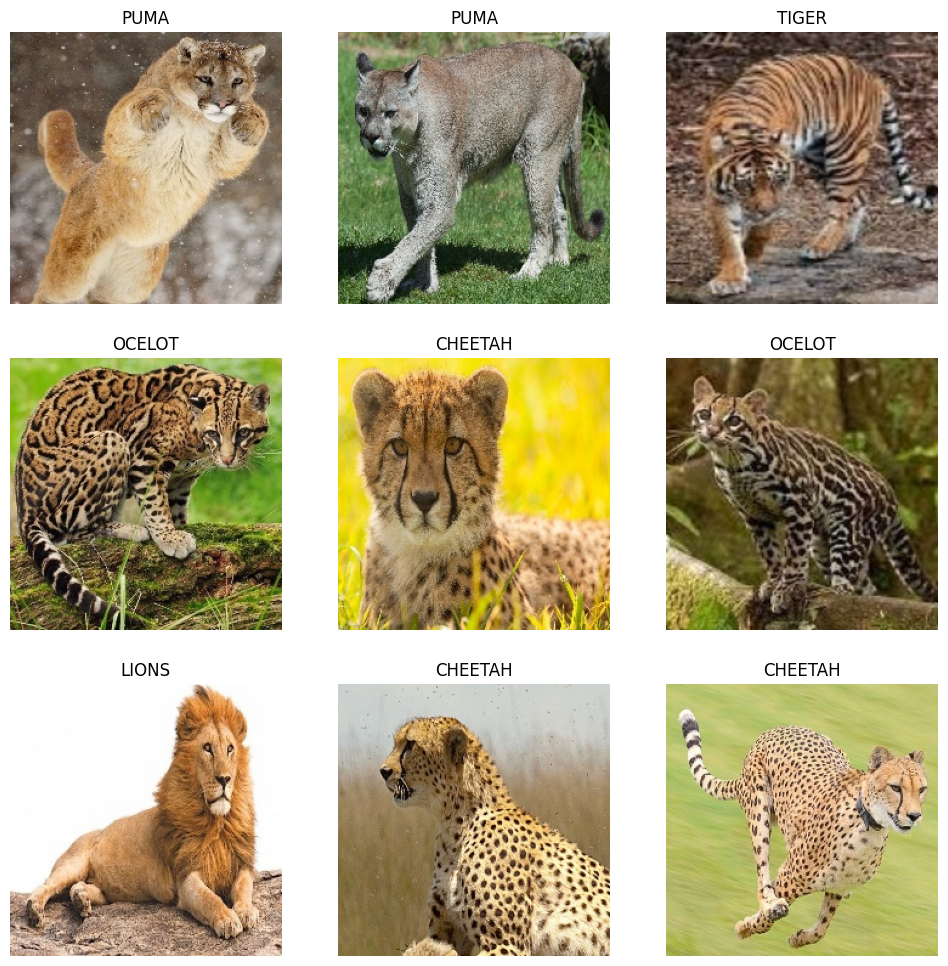

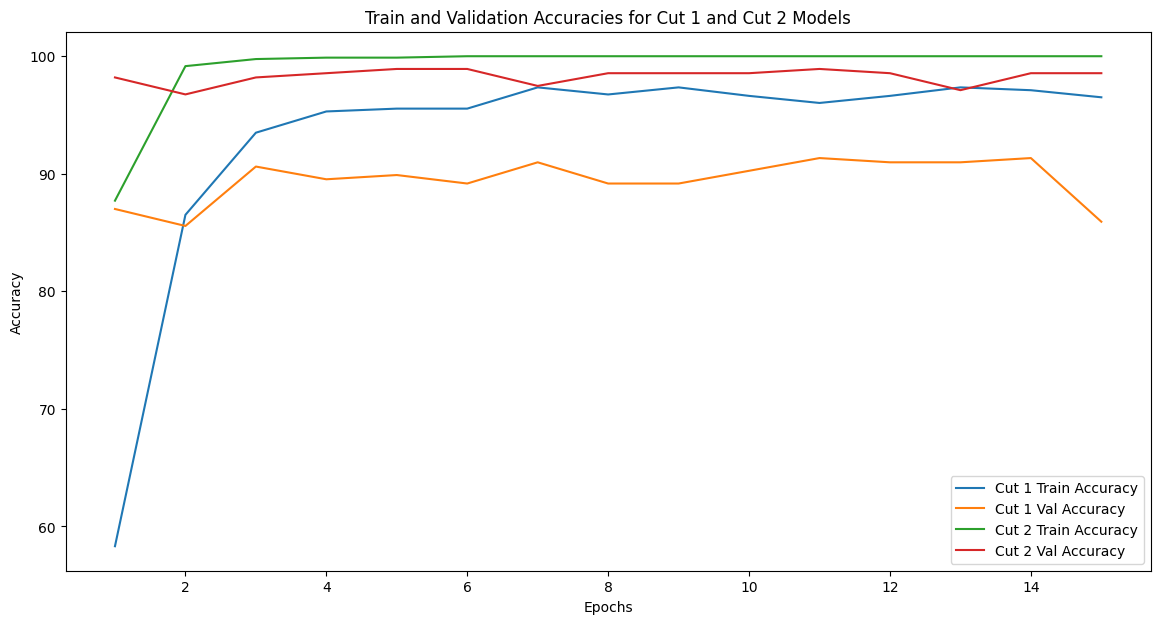

In [7]:
#import os
#import numpy as np
#import torch
#import torch.nn as nn
#import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
#import torchvision.datasets as datasets
#from torch.utils.data import DataLoader, Dataset
#import matplotlib.pyplot as plt
#from PIL import Image
#from sklearn.model_selection import train_test_split
#from google.colab import drive

# Upload images from the specified folder
def load_imgs(path, folders):
    imgs = []
    labels = []
    n_imgs = 0
    for c in folders:
        # For each file in the folder
        for f in os.listdir(os.path.join(path, c)):
            if not f.endswith('.jpg'):
                continue
            # Upload Image
            im = Image.open(os.path.join(path, c, f)).copy()
            imgs.append(im)
            labels.append(c)
        print('Caricate {} immagini della classe {}'.format(len(imgs) - n_imgs, c))
        n_imgs = len(imgs)
    print('Caricate {} immagini totali.'.format(n_imgs))
    return imgs, labels

# function to visualize a sample of images with labels
def plot_sample(imgs, labels, nrows=4, ncols=4, resize=None):
    # Create image grid
    fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    # Take random sample of images
    indices = np.random.choice(len(imgs), size=nrows*ncols, replace=False)
    for ax, idx in zip(axs.reshape(-1), indices):
        ax.axis('off')
        # Visualize image
        ax.set_title(labels[idx])
        im = imgs[idx]
        if isinstance(im, np.ndarray):
            im = Image.fromarray(im)
        if resize is not None:
            im = im.resize(resize)
        ax.imshow(im, cmap='gray')

# Mapping class -> index
label_to_idx = {
    'CHEETAH': 0,
    'OCELOT': 1,
    'CARACAL': 2,
    'LIONS': 3,
    'TIGER': 4,
    'PUMA': 5
}

# Mapping index -> class
idx_to_label = {v: k for k, v in label_to_idx.items()}

# Function for creating dataset
def make_dataset(imgs, labels, label_map, img_size):
    x = []
    y = []
    for im, l in zip(imgs, labels):
        # Preprocess image
        x_i = im.resize(img_size)
        x_i = np.asarray(x_i)

        # Code label
        y_i = label_map[l]

        x.append(x_i)
        y.append(y_i)
    return np.array(x).astype('float32'), np.array(y)

# Function to save the model
def save_model(model, filepath):
    torch.save(model.state_dict(), filepath)

# Function to upload the model
def load_model(model_class, filepath, device='cpu'):
    model = model_class()
    model.load_state_dict(torch.load(filepath, map_location=device))
    model.to(device)
    return model

# Define class Dataset
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.data)

# Google Drive
drive.mount('/content/drive')

# Upload images from Google Drive folder
imgs, labels = load_imgs('/content/drive/My Drive/Wild Cats Dataset', ['CHEETAH', 'OCELOT', 'CARACAL', 'LIONS', 'TIGER', 'PUMA'])
X, y = make_dataset(imgs, labels, label_to_idx, (224, 224))
print('Shape di X: {}, Shape di y: {}'.format(X.shape, y.shape))

# Visualize sample of images
plot_sample(imgs, labels, 3, 3, resize=(224, 224))

# Divide dataset in training set and validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Trasformations for the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[129.73103399, 115.74991322, 93.65555466], std=[62.75922075, 58.79315587, 59.74380684]),
])

# DataLoader
train_dataset = CustomDataset(X_train, y_train, transform=transform)
val_dataset = CustomDataset(X_val, y_val, transform=transform)
test_dataset = CustomDataset(X_test, y_test, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

class CuttedModifiedVGG19(nn.Module):
    def __init__(self, cut_value):
        super(CuttedModifiedVGG19, self).__init__()
        # Load the pre-trained VGG19 model
        vgg19 = models.vgg19(pretrained=True)
        # Extract the feature extractor part of VGG19 (all layers up to the cut_value)
        self.features = nn.Sequential(*list(vgg19.features.children())[:cut_value])

        # Freeze the parameters of the pre-trained layers
        for param in self.features.parameters():
            param.requires_grad = False

        # Add your additional layers after the cut
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self._get_conv_output_size(), 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 6)  # Assuming we have 6 classes
        )

    def _get_conv_output_size(self):
        # Create a dummy input tensor with the same shape as the input images
        with torch.no_grad():
            dummy_input = torch.zeros(1, 3, 224, 224)
            output = self.features(dummy_input)
            output = output.view(output.size(0), -1)
            return output.size(1)

    def forward(self, x):
        # Pass input through VGG19 feature extractor
        x = self.features(x)
        # Pass through the classifier
        x = self.classifier(x)
        return x

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the models with the specified cuts
cut1_model = CuttedModifiedVGG19(cut_value=25)  # Up to the 11th convolutional layer (Block 4)
cut2_model = CuttedModifiedVGG19(cut_value=36)  # All convolutional layers (Block 5)

# Move the models to the device
cut1_model.to(device)
cut2_model.to(device)

# Define the loss function and optimizers
criterion = nn.CrossEntropyLoss()
cut1_optimizer = optim.Adam(cut1_model.classifier.parameters(), lr=0.0001)
cut2_optimizer = optim.Adam(cut2_model.classifier.parameters(), lr=0.0001)

# Training function
def train_model(model, optimizer, train_loader, val_loader, n_epochs):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(n_epochs):
        model.train()
        running_loss, correct_train, total_train = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train

        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

        val_loss /= len(val_loader)
        val_accuracy = 100 * correct_val / total_val

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{n_epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

        # Aggiorna l'indicatore di epoca
        epoch += 1

    return train_losses, val_losses, train_accuracies, val_accuracies

# Training models
n_epochs = 15
print("Training Cut 1 Model")
cut1_train_losses, cut1_val_losses, cut1_train_accuracies, cut1_val_accuracies = train_model(cut1_model, cut1_optimizer, train_loader, val_loader, n_epochs)
print("Training Cut 2 Model")
cut2_train_losses, cut2_val_losses, cut2_train_accuracies, cut2_val_accuracies = train_model(cut2_model, cut2_optimizer, train_loader, val_loader, n_epochs)

# Evaluate on test set
def evaluate_model(model, test_loader):
    model.eval()
    test_loss, correct_test, total_test = 0.0, 0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_test += (predicted == labels).sum().item()
            total_test += labels.size(0)

    test_loss /= len(test_loader)
    test_accuracy = 100 * correct_test / total_test

    return test_loss, test_accuracy

print("Evaluating Cut 1 Model")
cut1_test_loss, cut1_test_accuracy = evaluate_model(cut1_model, test_loader)
print(f"Cut 1 Test Loss: {cut1_test_loss:.4f}, Test Accuracy: {cut1_test_accuracy:.2f}%")

print("Evaluating Cut 2 Model")
cut2_test_loss, cut2_test_accuracy = evaluate_model(cut2_model, test_loader)
print(f"Cut 2 Test Loss: {cut2_test_loss:.4f}, Test Accuracy: {cut2_test_accuracy:.2f}%")

# Plot accuracies
epochs = range(1, n_epochs+1)
plt.figure(figsize=(14, 7))
plt.plot(epochs, cut1_train_accuracies, label='Cut 1 Train Accuracy')
plt.plot(epochs, cut1_val_accuracies, label='Cut 1 Val Accuracy')
plt.plot(epochs, cut2_train_accuracies, label='Cut 2 Train Accuracy')
plt.plot(epochs, cut2_val_accuracies, label='Cut 2 Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracies for Cut 1 and Cut 2 Models')
plt.show()


# TASK 3 BONUS
## DIFFERENT CUTS IN EACH BLOCK OF VGG19

Training and evaluating models for block 1
Cut 1 for block 1
Epoch [1/15], Train Loss: 17.5275, Train Acc: 20.84%, Val Loss: 1.7969, Val Acc: 25.63%
Epoch [2/15], Train Loss: 1.7583, Train Acc: 20.00%, Val Loss: 1.6841, Val Acc: 21.30%
Epoch [3/15], Train Loss: 1.7111, Train Acc: 24.46%, Val Loss: 1.6674, Val Acc: 36.10%
Epoch [4/15], Train Loss: 1.5994, Train Acc: 28.80%, Val Loss: 1.8610, Val Acc: 25.63%
Epoch [5/15], Train Loss: 1.7058, Train Acc: 21.20%, Val Loss: 1.7430, Val Acc: 23.47%
Epoch [6/15], Train Loss: 1.7633, Train Acc: 22.17%, Val Loss: 1.5200, Val Acc: 33.57%
Epoch [7/15], Train Loss: 1.6630, Train Acc: 23.86%, Val Loss: 1.6361, Val Acc: 33.21%
Epoch [8/15], Train Loss: 1.6202, Train Acc: 25.90%, Val Loss: 1.6880, Val Acc: 27.80%
Epoch [9/15], Train Loss: 1.5969, Train Acc: 27.11%, Val Loss: 1.5235, Val Acc: 39.71%
Epoch [10/15], Train Loss: 1.5487, Train Acc: 27.59%, Val Loss: 1.4645, Val Acc: 36.46%
Epoch [11/15], Train Loss: 1.5370, Train Acc: 29.64%, Val Loss: 1.4

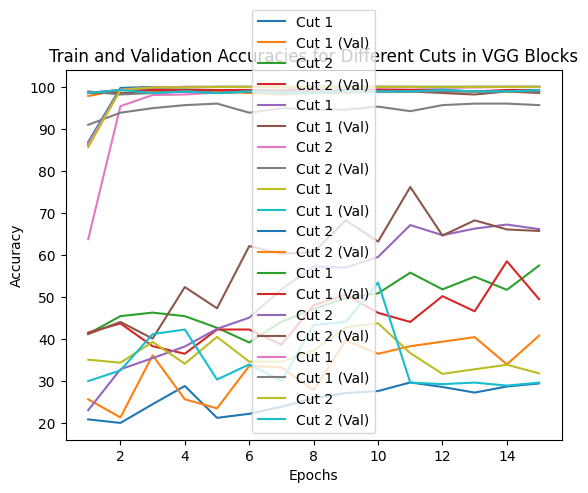

In [8]:
# Define the cuts for each block of VGG
cuts_per_block = [[5, 15], [10, 30], [20, 45], [40, 75], [50, 100]]

# Training and evaluation loops
for block_idx, cuts in enumerate(cuts_per_block):
    print(f"Training and evaluating models for block {block_idx + 1}")
    for cut_idx, cut_value in enumerate(cuts):
        print(f"Cut {cut_idx + 1} for block {block_idx + 1}")

        # Initialize the model with the specified cut
        model = CuttedModifiedVGG19(cut_value=cut_value)

        # Move the model to the device
        model.to(device)

        # Define the optimizer
        optimizer = optim.Adam(model.classifier.parameters(), lr=0.0001)

        # Train the model
        train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, optimizer, train_loader, val_loader, n_epochs)

        # Evaluate the model on the test set
        test_loss, test_accuracy = evaluate_model(model, test_loader)
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

        # Plot the accuracies
        plt.plot(range(1, n_epochs + 1), train_accuracies, label=f"Cut {cut_idx + 1}")
        plt.plot(range(1, n_epochs + 1), val_accuracies, label=f"Cut {cut_idx + 1} (Val)")

# Show plot
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracies for Different Cuts in VGG Blocks')
plt.show()



# SAVE MODELS TASK 1 (FFNN) AND TASK 2 (CNN)


In [10]:
from google.colab import files

# Salva i file nell'ambiente di Colab
torch.save(model.state_dict(), 'modelFFNN.pth')
torch.save(model2.state_dict(), 'modelCNN.pth')

# Scarica i file su desktop
files.download('modelFFNN.pth')
files.download('modelCNN.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>